In [1]:
import sys
sys.path.append("/Users/coffee/Documents/code/QkidsAutomation")
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from teacher_appointment.matrix import get_data

In [2]:
df = get_data()

查看5周内数据： 共有750245 老师被排课， 其中最终各种原因没有上课 292247人(1.0), 其中直接没有来的17707人


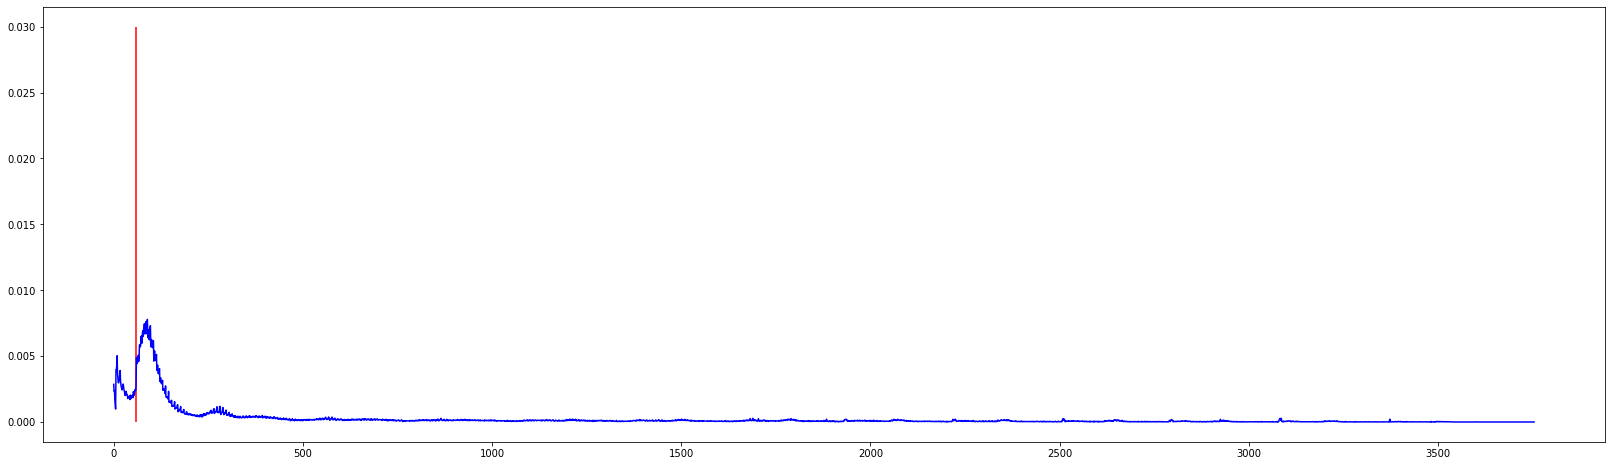

In [53]:
# data = df.loc[df.status.isin([2,4,9])]
total = len(data)
c = data.status==9
print(f"查看5周内数据： 共有{len(df)} 老师被排课， 其中最终各种原因没有上课 {len(data)}人({round(len(data)/total,2)}), 其中直接没有来的{c.sum()}人")
plt.figure(figsize=(28, 8))
ax = plt.subplot()
interval = 5
b = data.loc[~c & (data.interval > 0),'interval'] // 60 // interval
d = b.value_counts().sort_index()
ax.plot(d.index, d.values / d.sum(), 'b-')
top = d.max()
ax.vlines(300 /interval, 0, 0.03, colors='r')

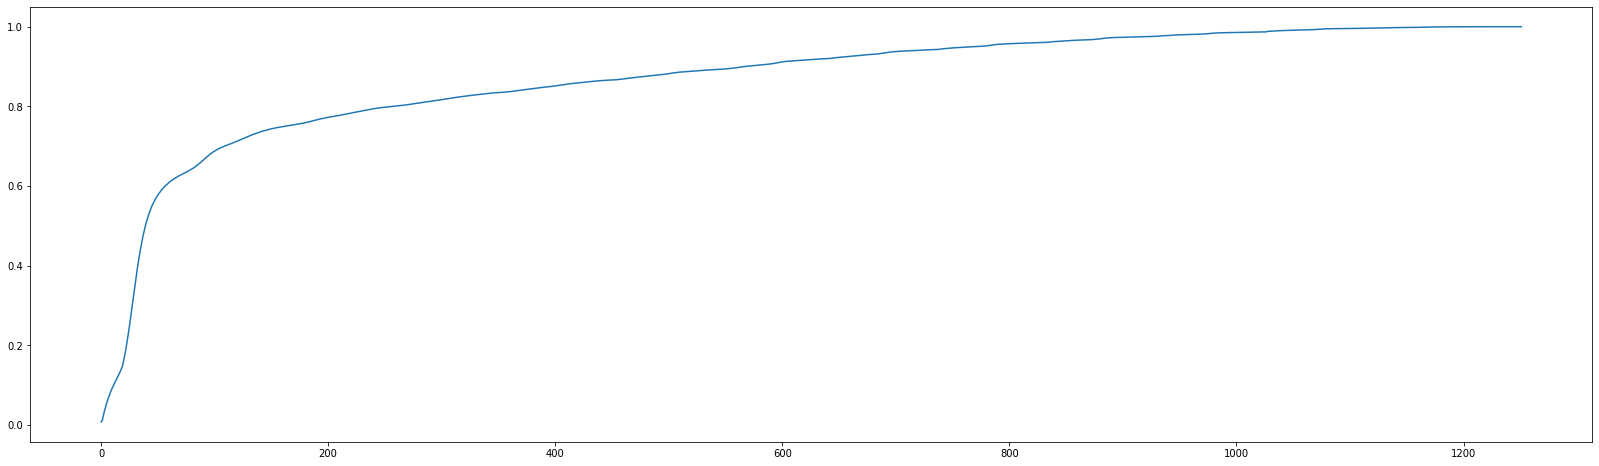

In [50]:
dd = d / d.sum()
dd.cumsum().plot(figsize=(28,8))

In [67]:
def analysis(slot_index, plot=False):
    total = (df.i == slot_index).sum()
    slot_df = df.loc[df.i == slot_index]
    time = slot_df.iloc[0,0].strftime('%A %H:%M:00')
    data = slot_df.loc[ slot_df.status.isin([2,4,9])]
    c = (data.status==9)
    print(f"查看5周内数据： {time} 共有{total} 老师被排课， 其中最终各种原因没有上课 {len(data)}人({round(len(data)/total,2)}), 其中直接没有来的{c.sum()}人")
    if plot:
        b = data.loc[~c & (data.interval > 0),'interval'] // 60 // 60 
        d = b.value_counts().sort_index()
        plt.figure(figsize=(28, 8))
        ax = plt.subplot()
        ax.plot(d.index, d.values, 'b-')
        top = d.max()
        ax.vlines(5, 0, top, colors='r')
        ax.set_title(time)
        in_5 = d[:5].sum()
        out_5 = d[6:].sum()
        plt.show()
        print(f"由可以看出来, 在请假的总数{in_5+out_5}中 : in 5 hours {in_5}({round(in_5 / (in_5+out_5),4) }), out of 5 hours {out_5}({round(out_5 / (in_5+out_5), 4)})")

In [ ]:
slot_index = 8

查看5周内数据： Monday 19:10:00 共有16204 老师被排课， 其中最终各种原因没有上课 5521人(0.34), 其中直接没有来的468人


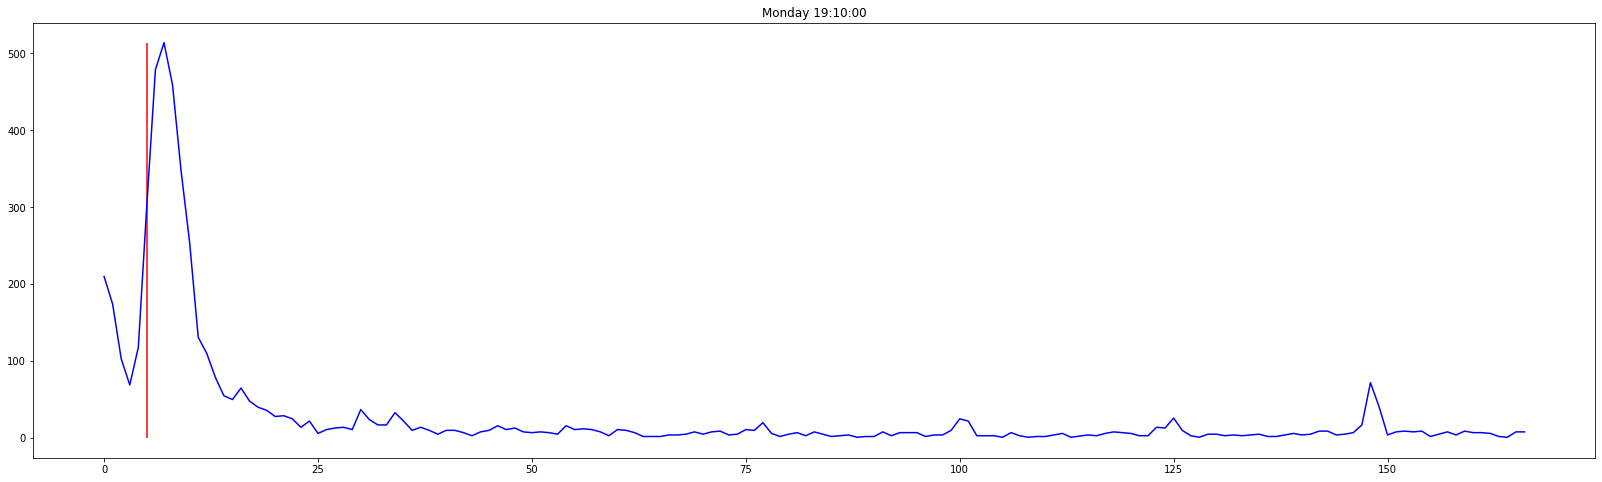

由可以看出来, 在请假的总数4927中 : in 5 hours 978(0.1985), out of 5 hours 3949(0.8015)


In [65]:
analysis(8, True)

In [68]:
for i in range(77):
    analysis(i)

查看5周内数据： Monday 08:30:00 共有5787 老师被排课， 其中最终各种原因没有上课 2570人(0.44), 其中直接没有来的112人
查看5周内数据： Monday 09:10:00 共有6371 老师被排课， 其中最终各种原因没有上课 2842人(0.45), 其中直接没有来的107人
查看5周内数据： Monday 09:50:00 共有5905 老师被排课， 其中最终各种原因没有上课 2725人(0.46), 其中直接没有来的73人
查看5周内数据： Monday 10:30:00 共有5391 老师被排课， 其中最终各种原因没有上课 2632人(0.49), 其中直接没有来的88人
查看5周内数据： Monday 11:10:00 共有4520 老师被排课， 其中最终各种原因没有上课 2298人(0.51), 其中直接没有来的65人
查看5周内数据： Monday 11:50:00 共有3079 老师被排课， 其中最终各种原因没有上课 1515人(0.49), 其中直接没有来的46人
查看5周内数据： Monday 17:50:00 共有5473 老师被排课， 其中最终各种原因没有上课 1905人(0.35), 其中直接没有来的165人
查看5周内数据： Monday 18:30:00 共有13880 老师被排课， 其中最终各种原因没有上课 4769人(0.34), 其中直接没有来的465人
查看5周内数据： Monday 19:10:00 共有16204 老师被排课， 其中最终各种原因没有上课 5521人(0.34), 其中直接没有来的468人
查看5周内数据： Monday 19:50:00 共有16103 老师被排课， 其中最终各种原因没有上课 5482人(0.34), 其中直接没有来的445人
查看5周内数据： Monday 20:30:00 共有14846 老师被排课， 其中最终各种原因没有上课 5200人(0.35), 其中直接没有来的413人
查看5周内数据： Tuesday 08:30:00 共有8036 老师被排课， 其中最终各种原因没有上课 3046人(0.38), 其中直接没有来的166人
查看5周内数据： Tuesday 09:10:00 共有8837 老师被排课， 其中最终各种原因没有上课 3126人(0.35

In [5]:
slot_index = 34
slot_df = df.loc[df.i == slot_index]
c = slot_df.status.isin([2,4,9])
b = slot_df.loc[~c & (slot_df.interval > 0),'interval'] // 60 // 60 

In [6]:
b

55      1.0
171     0.0
207     0.0
217     0.0
273     0.0
       ... 
576     0.0
715     0.0
833     0.0
1025    0.0
1217    0.0
Name: interval, Length: 102, dtype: float64

In [7]:
s = df.groupby(['i', 'teacher_id']).count()

In [10]:
ss = s.loc[s.begin == 5].index

In [11]:
ss

MultiIndex([( 0,     62),
            ( 0,    125),
            ( 0,    267),
            ( 0,    588),
            ( 0,    593),
            ( 0,    763),
            ( 0,    814),
            ( 0,    835),
            ( 0,    859),
            ( 0,    953),
            ...
            (76, 439063),
            (76, 440378),
            (76, 440751),
            (76, 441676),
            (76, 441697),
            (76, 441856),
            (76, 442021),
            (76, 442549),
            (76, 445132),
            (76, 448258)],
           names=['i', 'teacher_id'], length=74804)

In [15]:
sss = ss[3434]
ssss = (df.i == sss[0] ) & (df.teacher_id == sss[1])
v = df.loc[ssss]

In [23]:
copy_df  = df[df.status.isin([2,4,9])].copy()

In [28]:
copy_df

,begin,teacher_id,status,interval,i
3,2020-03-08 20:30:00,125,2,28527.0,76
5,2020-03-08 20:30:00,360,4,5314.0,76
8,2020-03-08 20:30:00,615,2,1057824.0,76
9,2020-03-08 20:30:00,657,2,20624.0,76
10,2020-03-08 20:30:00,661,2,23592.0,76
...,...,...,...,...,...
972,2020-03-30 08:30:00,438864,2,44275.0,0
977,2020-03-30 08:30:00,442346,2,21837.0,0
979,2020-03-30 08:30:00,443102,4,8789.0,0
981,2020-03-30 08:30:00,443629,2,90950.0,0


In [30]:
type(copy_df.iloc[0,3])

numpy.float64

In [31]:
copy_df['interval'] = copy_df.apply(lambda x: x.interval//60 if x.interval > 0 else 0, axis =1)

In [35]:
copy_df.groupby('i').agg({'interval':['std', 'mean']})

interval             
            std         mean
i                           
0   2215.169308  1519.360311
1   2214.083948  1505.624912
2   2304.362813  1596.758532
3   2547.932733  1810.219985
4   2486.942822  1791.280244
..          ...          ...
72  4138.075528  2271.137455
73  4380.020954  2366.535449
74  4385.564544  2431.579751
75  4171.050016  2317.848406
76  4214.111008  2402.234750

[77 rows x 2 columns]